# LAB 1: Fundamentals of Machine Learning

Group 30:
Nicolas Scheidler (nicsch-3) and Sergio Serrano Hernández (serser-1)

In [1]:
import os
import time
import numpy as np
from skimage import io

import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

from keras.datasets import mnist

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, f1_score
from sklearn import datasets, svm

## Fundamentals of data pre-processing and basic skills in Jupyter

### Task 1.1

In [2]:
filenames = [i for i in os.listdir() if i.endswith(".jpg")]

images = []
labels = []
for f_name in filenames:
    images.append(
        io.imread(f_name)
    )
    labels.append(f_name.split("-")[0])

# Making a numpy array from images
images = np.array(images)

print(f"Loaded images in a vector with shape {images.shape}")

Loaded images in a vector with shape (8, 60, 45, 3)


In [3]:
def PlotSample(images, index):
    plt.title(f'Index {index}')
    plt.imshow(images[index])
    plt.show()
    plt.close()

Most of the code for the preprocessing comes from the website https://hadrienj.github.io/posts/Preprocessing-for-deep-learning/

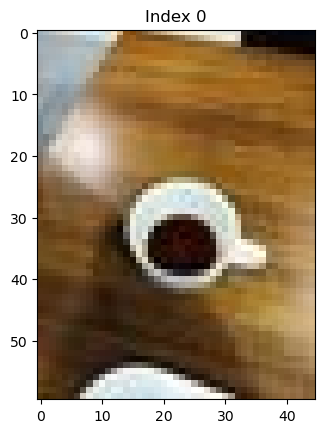

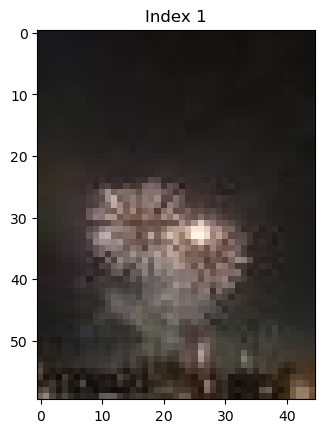

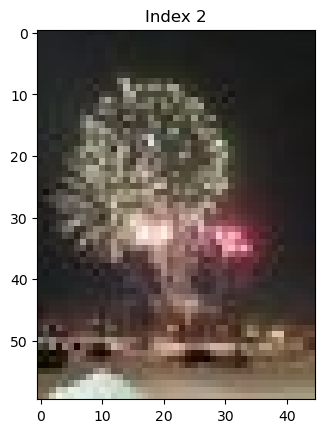

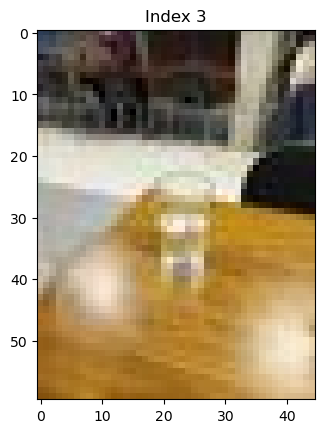

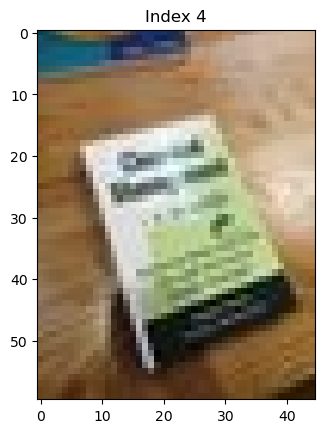

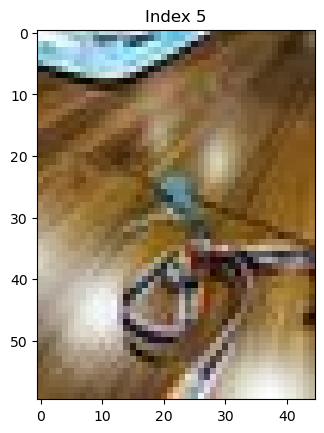

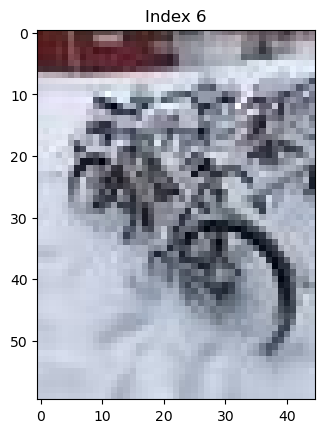

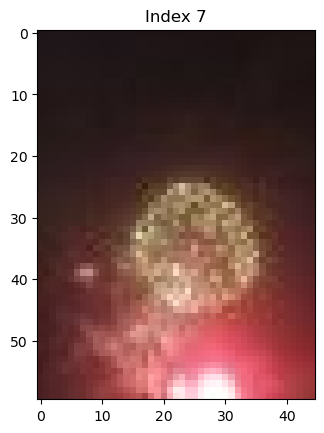

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


### CENTERED IMAGES ###


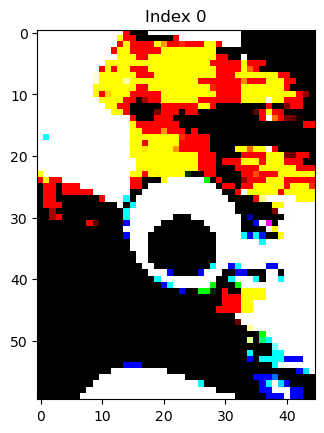

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


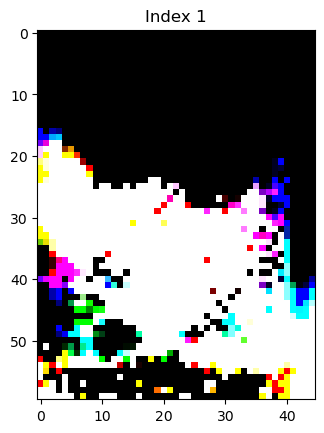

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


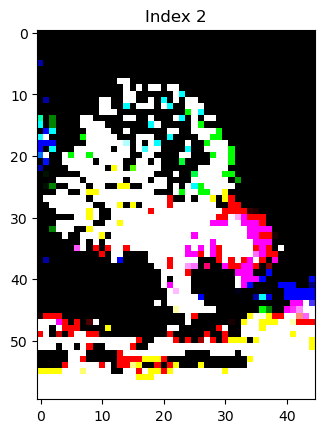

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


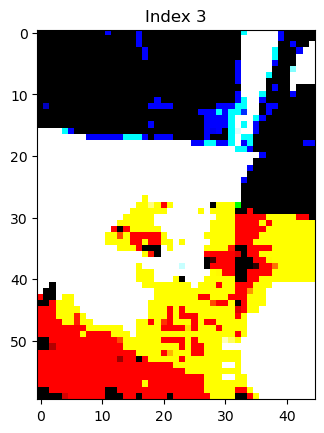

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


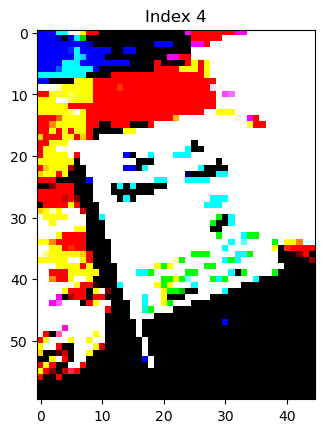

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


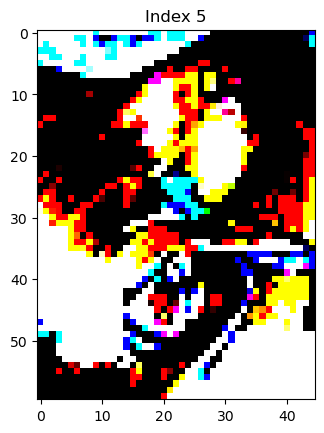

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


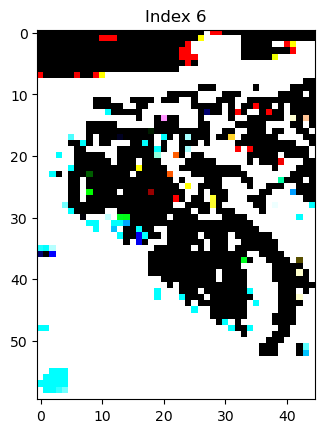

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


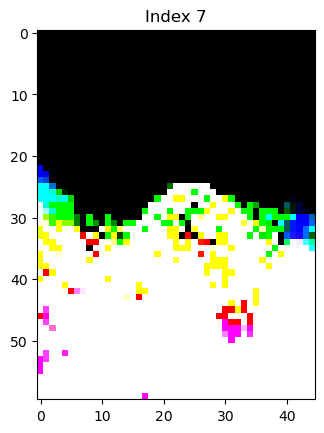

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


### STANDARDIZED IMAGES ###


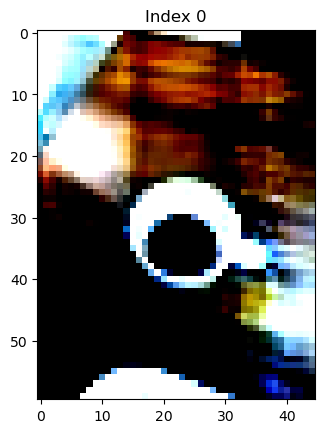

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


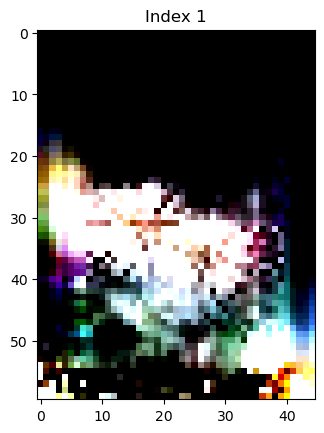

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


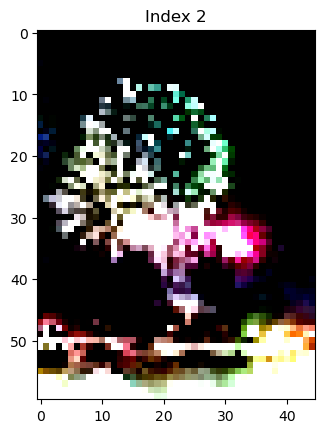

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


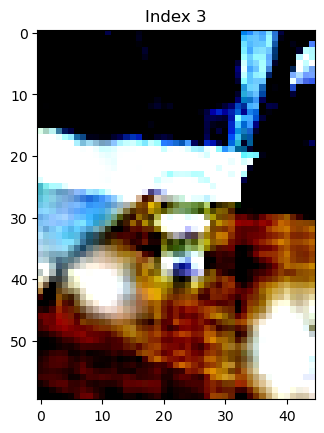

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


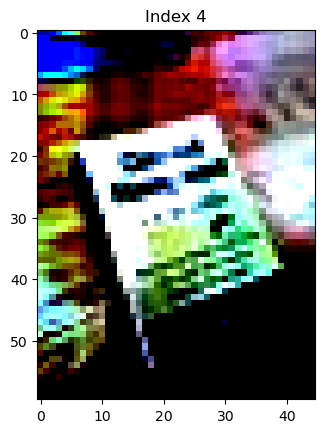

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


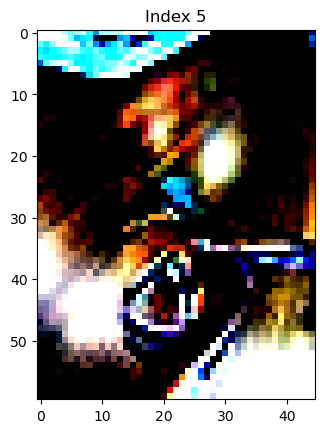

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


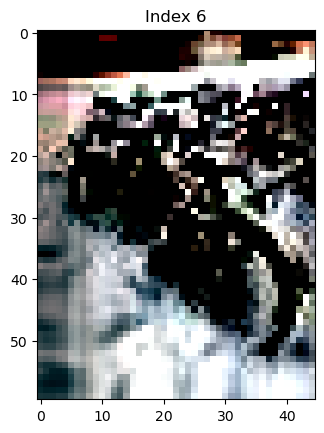

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


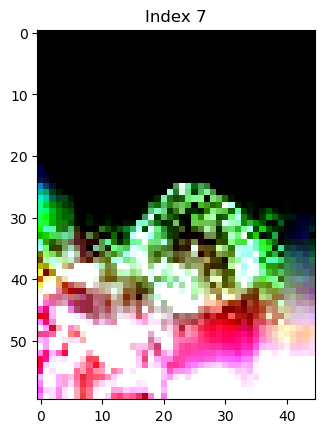

In [4]:
for i in range(len(images)):
    PlotSample(images, i)

def center(X):
    newX = X - np.mean(X, axis = 0)
    return newX

print("### CENTERED IMAGES ###")
centered = np.array([center(i) for i in images])

for i in range(len(images)):
    PlotSample(centered, i)

def standardize(X):
    newX = center(X)/np.std(X, axis = 0)
    return newX

print("### STANDARDIZED IMAGES ###")
standardized = np.array([standardize(i) for i in centered])

for i in range(len(images)):
    PlotSample(standardized, i)

Whitening following the paper from Pal & Sudeep (2016) (Zero Component Analysis)

In [5]:
# To preprocess the images, we first have to flatten our array, this will make the preprocessing easier

X = images.reshape(images.shape[0], images.shape[1]*images.shape[2]*images.shape[3])
X.shape

(8, 8100)

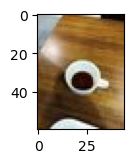

In [6]:
def plotImage(X):
    plt.figure(figsize=(1.5, 1.5))
    plt.imshow(X.reshape(images[0].shape))
    plt.show()
    plt.close()

plotImage(X[0])

In [7]:
X_norm = X / 255.
print('X.min()', X_norm.min())
print('X.max()', X_norm.max())
# All values are contained between 0 and 1

X.min() 0.0
X.max() 1.0


In [8]:
# Per pixel mean substraction
X_norm = X_norm - X_norm.mean(axis=0)

In [ ]:
cov = np.cov(X_norm, rowvar=False)

U,S,V = np.linalg.svd(cov)
epsilon = 0.1
X_ZCA = U.dot(np.diag(1.0/np.sqrt(S + epsilon))).dot(U.T).dot(X_norm.T).T
X_ZCA_rescaled = (X_ZCA - X_ZCA.min()) / (X_ZCA.max() - X_ZCA.min())

In [ ]:
for i in range(len(images)):
    plotImage(X[i, :])
    plotImage(X_ZCA_rescaled[i, :])

### Task 1.2

#### 1

In [2]:
start = time.time()
x = np.load("vecs.npy", allow_pickle=True).tolist()

labels = np.empty(0)
embeddings = np.empty((0, 1024))
positions = np.empty(0)

#Looping through the dictionnary
for position in x.keys():
    for digit in x[position].keys():
        embeddings = np.vstack([embeddings, x[position][digit]])
        labels = np.hstack([labels, np.repeat(digit, len(x[position][digit]))])
        positions = np.hstack([positions, np.repeat(position, len(x[position][digit]))])


# End, the data is in contained in labels and 
end = time.time()

print("Loading the data took {:.2f}s".format(end - start))

Loading the data took 2.03s


Understand the data structure and writing the code to load this data took us 20 minutes

#### 2
To form two numpy arrays determined by a special position, we can use the mask as follows

In [3]:
position = "1_pos"

e, l = embeddings[positions == position], labels[positions == position]

#### 3
The following code shuffles the dataset and preserves the corresponding labels

In [4]:
a = [ i for i in range(10)]
b = [ i for i in range(10)]

In [5]:
shuffle(a,b)

[[1, 7, 6, 9, 3, 8, 5, 2, 4, 0], [1, 7, 6, 9, 3, 8, 5, 2, 4, 0]]

For instance, we could use

In [6]:
shuffled_e, shuffled_l = shuffle(e, l)

## Nearest Neighbour classifier: skills of working with datasets and hyperparameters

In [7]:
(Xtr, Ltr), (X_test, L_test)=mnist.load_data()

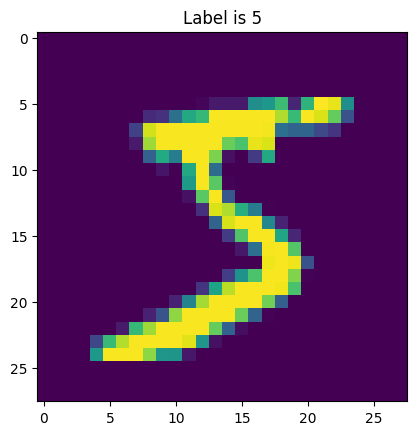

In [8]:
Image=Xtr[0,:,:]
Label=Ltr[0]


plt.title('Label is {Label}'.format(Label=Label))
plt.imshow(Image)

plt.show()
plt.close()

In [13]:
#Traing phase
num_sample=500
Tr_set=Xtr[:num_sample,:,:]
Ltr_set=Ltr[:num_sample]

Tr_set=Tr_set.reshape(num_sample,Tr_set.shape[1]*Tr_set.shape[2])

Tr_set.shape

(500, 784)

### Task 2.1

In [10]:
def normL1(X):    
    num_test=X.shape[0]
    Lpred=np.zeros(num_test, dtype=Ltr_set.dtype)
    
    for i in range(num_test):
        distances=np.sum(np.abs(Tr_set-X[i,:]),axis=1)
        
        min_index= np.argmin(distances)
        Lpred[i]=Ltr_set[min_index]
    return Lpred

In [11]:
def predict(X, norm=normL1):
    return norm(X)

In [14]:
Test_images=X_test.reshape(X_test.shape[0],X_test.shape[1]* X_test.shape[2])
Labels_predicted=predict(Test_images)

print("Accuracy:", np.mean(Labels_predicted==L_test))

Accuracy: 0.2649


In [15]:
def normL2(X):
    num_test=X.shape[0]
    Lpred=np.zeros(num_test, dtype=Ltr_set.dtype)
    
    for i in range(num_test):
        distances=np.sqrt(np.sum(np.square(Tr_set-X[i,:]),axis=1))
        
        min_index= np.argmin(distances)
        Lpred[i]=Ltr_set[min_index]
    return Lpred

In [16]:
Test_images=X_test.reshape(X_test.shape[0],X_test.shape[1]* X_test.shape[2])
Labels_predicted=predict(Test_images, normL2)

print("Accuracy:", np.mean(Labels_predicted==L_test))

Accuracy: 0.19


We can see that the accuracy is very low.
By checking why, we can notice that the computed distances are wrong: uint8 doesn't have a sufficient range of values and struggles to work with negatives which is problematic when deducting values. Instead, the data should be stored using more bits. We will then use int32

In [17]:
#Traing phase
Tr_set=Xtr[:num_sample,:,:]
Ltr_set=Ltr[:num_sample]

Tr_set=Tr_set.reshape(num_sample,Tr_set.shape[1]*Tr_set.shape[2]).astype(np.int32)

In [18]:
Test_images=X_test.reshape(X_test.shape[0],X_test.shape[1]* X_test.shape[2]).astype(np.int32)

Labels_predicted=predict(Test_images, normL1)
print("NormL1 Accuracy:", np.mean(Labels_predicted==L_test))

Labels_predicted=predict(Test_images, normL2)
print("NormL2 Accuracy:", np.mean(Labels_predicted==L_test))

NormL1 Accuracy: 0.811
NormL2 Accuracy: 0.8294


The accuracy is better now that this error has been fixed.

In [19]:
def normL1(X, Y):    
    return np.sum(np.abs(X-Y),axis=1)

def normL2(X, Y):
    return np.sqrt(np.sum(np.square(X-Y),axis=1))

In [20]:
class KNN:
    def __init__(self, k, norm=normL1):
        self.k = k
        self.norm = norm

    def train(self, Tr_set, Ltr_set):
        self.X = Tr_set
        self.y = Ltr_set

    def predict(self, X):
        num_test=X.shape[0]
        Lpred=np.zeros(num_test, dtype=Ltr_set.dtype)
        for i in range(num_test):
            distances=self.norm(self.X, X[i,:])
            
            min_index= np.argpartition(distances, self.k)[:self.k]
            Lpred[i]=np.argmax(np.bincount(self.y[min_index]))
        return Lpred

In [21]:
classifier = KNN(1, normL2)
classifier.train(Tr_set, Ltr_set)

In [22]:
Labels_predicted=classifier.predict(Test_images)

In [23]:
print("KNN Accuracy:", np.mean(Labels_predicted==L_test))

KNN Accuracy: 0.8294


### Task 2.2, Hyperparameter cross-validation

In [24]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)

In [25]:
results = {}
for k in [1,3,5,7,9,11]:
    print(f"Cross validation with k={k}, ", end="")
    accuracies = []
    for i, (train_index, test_index) in enumerate(kf.split(Tr_set)):
        print(".", end="")
        classifier = KNN(k, normL2)
        classifier.train(Tr_set[train_index], Ltr_set[train_index])

        accuracies.append(np.mean(classifier.predict(Tr_set[test_index])==Ltr_set[test_index]))

    results[k] = np.mean(accuracies)
    print(", accuracy = {:.4f}".format(np.mean(accuracies)))

Cross validation with k=1, ..., accuracy = 0.8320
Cross validation with k=3, ..., accuracy = 0.8240
Cross validation with k=5, ..., accuracy = 0.8160
Cross validation with k=7, ..., accuracy = 0.7980
Cross validation with k=9, ..., accuracy = 0.8000
Cross validation with k=11, ..., accuracy = 0.7860


In [26]:
results = []
K = [1,3,5,7,9,11]
for k in K:
    print(f"Cross validation with k={k}, ", end="")
    accuracies = []
    for i, (train_index, test_index) in enumerate(kf.split(Tr_set)):
        print(".", end="")
        classifier = KNN(k, normL2)
        classifier.train(Tr_set[train_index], Ltr_set[train_index])

        accuracies.append(np.mean(classifier.predict(Tr_set[test_index])==Ltr_set[test_index]))

    results.append(np.mean(accuracies))
    print(", accuracy = {:.4f}".format(np.mean(accuracies)))

print("best k = {}".format(K[np.argmax(results)]))

Cross validation with k=1, ..., accuracy = 0.8320
Cross validation with k=3, ..., accuracy = 0.8240
Cross validation with k=5, ..., accuracy = 0.8160
Cross validation with k=7, ..., accuracy = 0.7980
Cross validation with k=9, ..., accuracy = 0.8000
Cross validation with k=11, ..., accuracy = 0.7860
best k = 1


In [27]:
k = K[np.argmax(results)]
classifier = KNN(k, normL2)
classifier.train(Tr_set, Ltr_set)

Labels_predicted = classifier.predict(Test_images)
print(f"{k}-NN Accuracy:", np.mean(Labels_predicted==L_test))

1-NN Accuracy: 0.8294


## Support Vector Machines

Below you can see a demonstration of what is coded in the website and how you can see separation planes in 3 dimensions

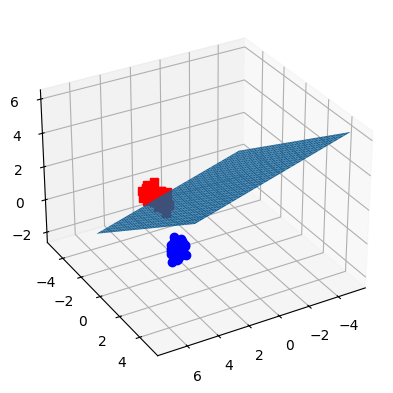

In [28]:
iris = datasets.load_iris()
X = iris.data[:, :3] # we only take the first three features.
Y = iris.target
#make it binary classification problem
X = X[np.logical_or(Y==0,Y==1)]
Y = Y[np.logical_or(Y==0,Y==1)]
model = svm.SVC(kernel='linear')
clf = model.fit(X, Y)
# The equation of the separating plane is given by all x so that np.dot(svc.coef_[0], x) + b = 0.
# Solve for w3 (z)
z = lambda x,y: (-clf.intercept_[0]-clf.coef_[0][0]*x
-clf.coef_[0][1]*y) / clf.coef_[0][2]
tmp = np.linspace(-5,5,30)
x,y = np.meshgrid(tmp,tmp)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot3D(X[Y==0,0], X[Y==0,1], X[Y==0,2],'ob')
ax.plot3D(X[Y==1,0], X[Y==1,1], X[Y==1,2],'sr')
ax.plot_surface(x, y, z(x,y))
ax.view_init(30, 60)
plt.show()

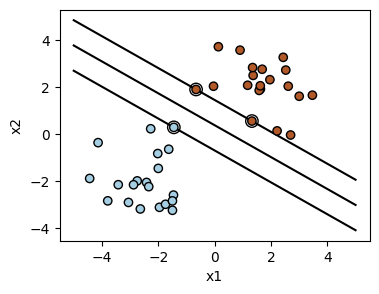

In [29]:
np.random.seed(2)
# we create 40 linearly separable points
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2)
+ [2, 2]]
Y = [0] * 20 + [1] * 20
# fit the model
clf = svm.SVC(kernel='linear', C=1)
clf.fit(X, Y)
# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.plot(xx, yy, "k-")
plt.plot(xx, yy_down, "k-")
plt.plot(xx, yy_up, "k-")
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:,1], s=80,
facecolors="none", zorder=10, edgecolors="k")
plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired,
edgecolors="k")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

### Task 3.1

In [33]:
# import some data to play with
iris = datasets.load_iris()

X = iris.data #All features
y = iris.target
feature_names = iris.feature_names[:4]
classes = iris.target_names


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, train_size=0.8)
print(X_train.shape)
print(X_test.shape)

print(Y_train.shape)
print(Y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


## Test the different options for the SVM classifiers and do their confusion matrices:
#### This belongs to tasks 3.1.1 and 3.1.2
Below we can see the results of using SVM with different configurations including:
1. Linear Kernel and One vs One training Approach.
2. Polynomial Kernel and One vs One training Approach.
3. RBF Kernel and One vs One training Approach.
4. Linear Kernel and One vs Rest training Approach.
5. Polynomial Kernel and One vs Rest training Approach.
6. RBF Kernel and One vs Rest training Approach.

        We can observe that the polynomial kernel returned perfect results for both ways of training


In [34]:
classifiers = [['linear','ovo'],['poly','ovo'],['rbf','ovo'],['linear','ovr'],['poly','ovr'],['rbf','ovr']]
Classifier = []
for params in classifiers:
    Classifier = svm.SVC(kernel = params[0], decision_function_shape = params[1]).fit(X_train, Y_train)
    classifier_params = Classifier.get_params()
    y_pred = Classifier.predict(X_test)
    accuracy = np.mean(y_pred == Y_test)
    f1 = f1_score(Y_test, y_pred, average='weighted')  # 'weighted' takes class imbalance into account
    conf_matrix = confusion_matrix(Y_test, y_pred)
    print(f"we obtain a F1 Score of: {f1} and an accuracy of: {accuracy} with the SVM classifier with {params[0]} kernel using the {params[1]} training approach")
    print(conf_matrix)

we obtain a F1 Score of: 0.9671094244149273 and an accuracy of: 0.9666666666666667 with the SVM classifier with linear kernel using the ovo training approach
[[ 6  0  0]
 [ 0  8  0]
 [ 0  1 15]]
we obtain a F1 Score of: 1.0 and an accuracy of: 1.0 with the SVM classifier with poly kernel using the ovo training approach
[[ 6  0  0]
 [ 0  8  0]
 [ 0  0 16]]
we obtain a F1 Score of: 0.9671094244149273 and an accuracy of: 0.9666666666666667 with the SVM classifier with rbf kernel using the ovo training approach
[[ 6  0  0]
 [ 0  8  0]
 [ 0  1 15]]
we obtain a F1 Score of: 0.9671094244149273 and an accuracy of: 0.9666666666666667 with the SVM classifier with linear kernel using the ovr training approach
[[ 6  0  0]
 [ 0  8  0]
 [ 0  1 15]]
we obtain a F1 Score of: 1.0 and an accuracy of: 1.0 with the SVM classifier with poly kernel using the ovr training approach
[[ 6  0  0]
 [ 0  8  0]
 [ 0  0 16]]
we obtain a F1 Score of: 0.9671094244149273 and an accuracy of: 0.9666666666666667 with the 

### Task 3.1.3: Extract the support vectors for each class in ovr training case

In [35]:
Classifier = svm.SVC(kernel = 'linear', decision_function_shape = 'ovr').fit(X_train, Y_train)
support_vectors = Classifier.support_vectors_
i = 0
print("class 1")
for j in range(Classifier.n_support_[0]):
    print(Classifier.support_vectors_[i])
    i += 1

print("class 2")
for j in range(Classifier.n_support_[1]):
    print(Classifier.support_vectors_[i])
    i += 1
    
print("class 3")
for j in range(Classifier.n_support_[2]):
    print(Classifier.support_vectors_[i])
    i += 1

class 1
[5.1 3.3 1.7 0.5]
[4.5 2.3 1.3 0.3]
[4.8 3.4 1.9 0.2]
class 2
[6.8 2.8 4.8 1.4]
[5.6 3.  4.5 1.5]
[5.9 3.2 4.8 1.8]
[6.7 3.  5.  1.7]
[5.4 3.  4.5 1.5]
[6.9 3.1 4.9 1.5]
[5.1 2.5 3.  1.1]
[6.3 3.3 4.7 1.6]
[6.  2.7 5.1 1.6]
[6.3 2.5 4.9 1.5]
[6.1 2.9 4.7 1.4]
class 3
[4.9 2.5 4.5 1.7]
[6.1 3.  4.9 1.8]
[6.2 2.8 4.8 1.8]
[5.9 3.  5.1 1.8]
[6.3 2.8 5.1 1.5]
[6.5 3.  5.2 2. ]
[6.4 3.1 5.5 1.8]
[6.  2.2 5.  1.5]
[6.5 3.2 5.1 2. ]


In [36]:
print((X_train[:,0].min(), X_train[:,0].max()))

(4.3, 7.7)


### Task 3.1.4: Plot the decision boundary for features 2 vs. 3 and 3 vs. 4.

    Now we are going to print the decision boundaries for features 2 vs 3 and 3 vs 4:

Text(0, 0.5, 'x2')

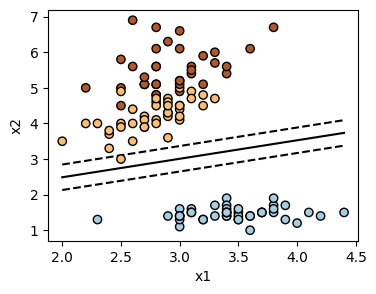

In [37]:
coefs = Classifier.coef_
w = Classifier.coef_[0] #0 corresponds to class 1vs2
x_points = np.linspace(X_train[:,1].min(), X_train[:,1].max())
y_points = (-w[1]/w[2]) * x_points - (Classifier.intercept_[0]) /w[2]
margin = 1/np.sqrt(np.sum(coefs**2))
aux_coef = np.sqrt(1+(-w[1]/w[2])**2)

upper_boundary = y_points + aux_coef*margin
lower_boundary = y_points - aux_coef*margin

# plot the line, the points, and the nearest vectors to the plane
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.plot(x_points, y_points, "k-")
plt.plot(x_points, lower_boundary, "k--")
plt.plot(x_points, upper_boundary, "k--")
plt.scatter(X_train[:, 1], X_train[:, 2], c=Y_train, zorder=10, cmap=plt.cm.Paired,
 edgecolors="k")
plt.xlabel("x1")
plt.ylabel("x2")

Now we will do the same with features 3 and 4

Text(0, 0.5, 'x2')

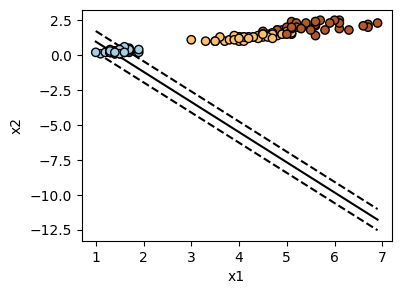

In [38]:
coefs = Classifier.coef_
w = Classifier.coef_[0] #0 corresponds to class 1vs2
x_points = np.linspace(X_train[:,2].min(), X_train[:,2].max())
y_points = (-w[2]/w[3]) * x_points - (Classifier.intercept_[0]) /w[3]
margin = 1/np.sqrt(np.sum(coefs**2))
aux_coef = np.sqrt(1+(-w[2]/w[3])**2)

upper_boundary = y_points + aux_coef*margin
lower_boundary = y_points - aux_coef*margin

# plot the line, the points, and the nearest vectors to the plane
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.plot(x_points, y_points, "k-")
plt.plot(x_points, lower_boundary, "k--")
plt.plot(x_points, upper_boundary, "k--")
plt.scatter(X_train[:, 2], X_train[:, 3], c=Y_train, zorder=10, cmap=plt.cm.Paired,
 edgecolors="k")
plt.xlabel("x1")
plt.ylabel("x2")